# Weekly project part 1
Using the image "appletree.jpg"
1) Can you segment the apples from the tree?
2) Can you get the computer to count how many there are? 
    How close can you get to the ground truth? (there are 26 apples in the image)
3) Can you change the color of one of them?
4) Can you segment the leaves?
    
    
# Weekly project part 2
1) Remove the greenscreen and replace the background in "itssp.png".
2) Can you improve the edge with eroding/dilating?


Number of detected apples = 21


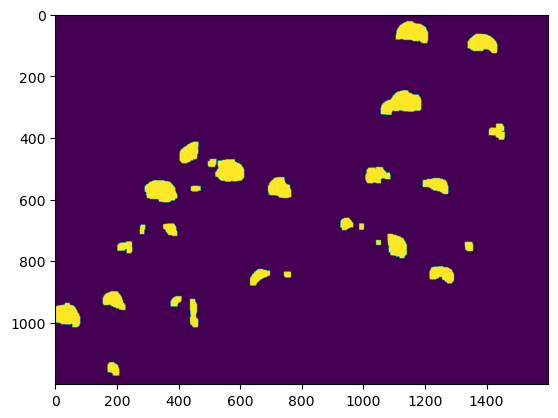

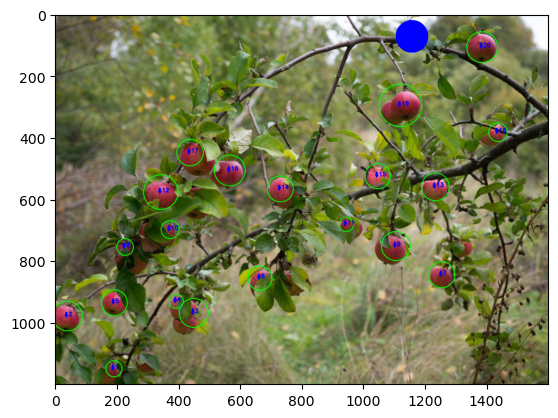

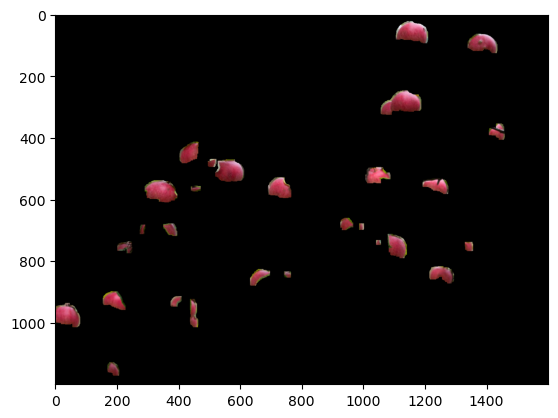

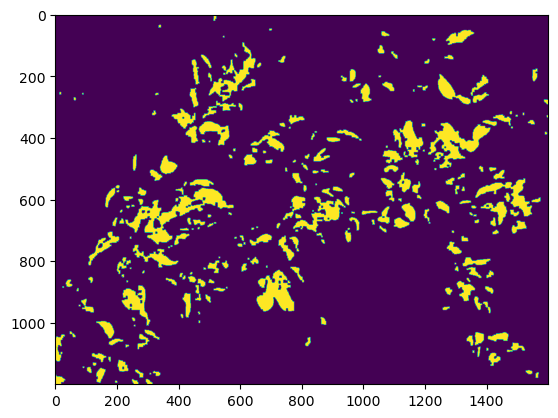

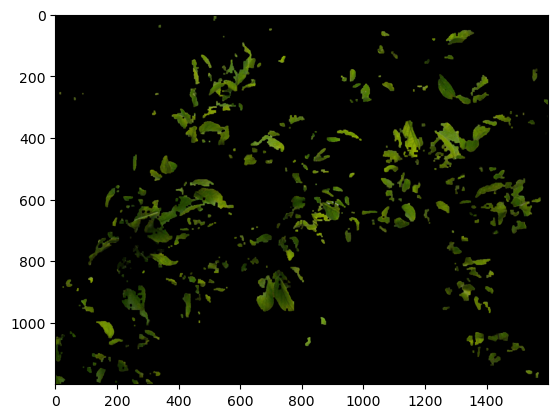

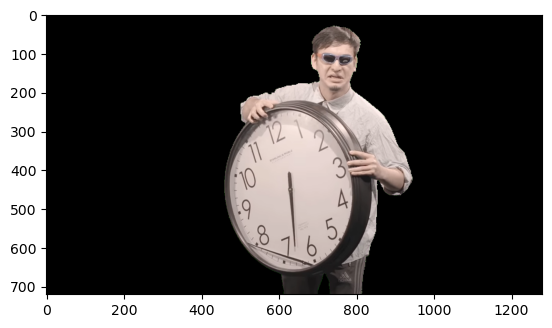

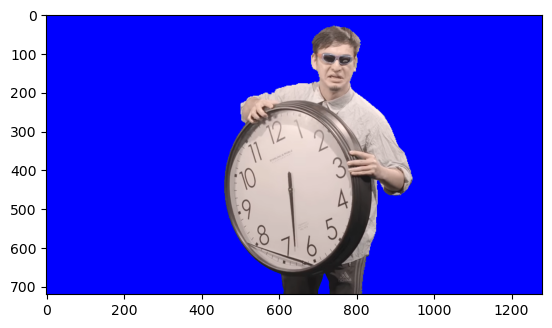

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('appletree.jpg')
image_cpy = image.copy()
image_d = image.copy()

low_apple_red = (72, 75, 71)
high_apple_red = (180.0, 255.0, 255.0)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask_apples = cv2.inRange(image_hsv,low_apple_red, high_apple_red)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask_apples = cv2.morphologyEx(mask_apples, cv2.MORPH_CLOSE,kernel)  
mask_apples = cv2.morphologyEx(mask_apples, cv2.MORPH_OPEN,kernel)    
mask_apples = cv2.dilate(mask_apples, None, iterations = 5)

plt.figure()
plt.imshow(mask_apples)


# Segmenting the apples from the tree
cnts,_ = cv2.findContours(mask_apples.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
c_num=0

# Drawing and counting the number of detected apples
for i,c in enumerate(cnts):
    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    #print(r)
    if r>20:
        c_num+=1
        if c_num == 21:
            image_dc = (255,0,0)
            cv2.circle(image_d, (int(x), int(y)), int(r), (255, 0, 0), -1)
        else:
            cv2.circle(image_d, (int(x), int(y)), int(r), (0, 255, 0), 2)
        
        cv2.putText(image_d, "#{}".format(c_num), (int(x) - 10, int(y)), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    else:
        continue

print(f"Number of detected apples = {c_num}")

# Masking the apples out
masked_img_apples = cv2.bitwise_and(image_cpy,image_cpy,mask = mask_apples)
masked_img_apples = cv2.cvtColor(masked_img_apples,cv2.COLOR_BGR2RGB)
image_d = cv2.cvtColor(image_d, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image_d)
plt.figure()
plt.imshow(masked_img_apples)


# Segmeting the leaves
low_leaves = (35,170,0)
high_leaves = (46,255,255)
mask_leaves = cv2.inRange(image_hsv,low_leaves, high_leaves)

fig=plt.figure()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask_leaves = cv2.morphologyEx(mask_leaves, cv2.MORPH_CLOSE,kernel)  
mask_leaves = cv2.morphologyEx(mask_leaves, cv2.MORPH_OPEN,kernel)    
plt.imshow(mask_leaves)

masked_img = cv2.bitwise_and(image,image,mask = mask_leaves)
masked_img = cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(masked_img)



# Part 2
img_ittsp = cv2.imread('ittsp.png')

background_low = (50,0,91)
background_high = (64,255,255)

image_ittsp_hsv = cv2.cvtColor(img_ittsp, cv2.COLOR_BGR2HSV)
mask_background = cv2.inRange(image_ittsp_hsv,background_low, background_high)

# removing the background
mask_background_not = cv2.bitwise_not(mask_background)
masked_ittsp = cv2.bitwise_and(img_ittsp,img_ittsp,mask = mask_background_not)
masked_ittsp = cv2.cvtColor(masked_ittsp,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(masked_ittsp)

# replacing the background
h,w,_ = img_ittsp.shape
color=(0, 0, 255) # sample of a color 
new_background = np.full((h,w, 3), color, np.uint8)
new_background = cv2.bitwise_and(new_background,new_background,mask = mask_background)       
    
final = cv2.bitwise_or(new_background, masked_ittsp)
plt.figure()
plt.imshow(final)